<a href="https://colab.research.google.com/github/shoofiash/BootcampTask/blob/main/Explanatory%20Model%20Analysis%20(Fraud%20Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       10/17/2014           OH   
1                   228   42         342868        6/27/2006           IN   
2                   134   29         687698         9/6/2000           OH   
3                   256   41         227811        5/25/1990           IL   
4                   228   44         367455         6/6/2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851        7/16/1991           OH   
996                 285   41         186934         1/5/2014           IL   
997                 130   34         918516        2/17/2003           OH   
998                 458   62         533940       11/18/2011           IL   
999                 456   60         556080       11/11/1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

#1. Identifikasi Jumlah Null pada Dataset

In [ ]:
#cek head data
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698         9/6/2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

Terdapat data yang missing karena tertulis tanda tanya (?). Oleh karena itu, dilakukan replace (?) menjadi NaN

In [ ]:
#melakukan cek isi setiap kolom
for x in df.columns:
  print(f"unik dari {x}")
  print(f"{df[x].unique()}")
  print()

unik dari months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 2

Dapat terlihat bahwa pada variabel yang terisi tanda tanya (?) yaitu collision_type, property_damage, serta police_report_available. Sebenarnya juga terdapat unique None pada authorities_contacted. Tetapi karena konteks dari variabelnya yaitu pihak berwenang yang dihubungi memang ada tipe jenis yang None, maka nilai tersebut bukan missing value.

In [ ]:
#mengganti ? dengan NaN
new_col = ["collision_type", "property_damage", "police_report_available"]
df[new_col] = df[new_col].replace("?",np.nan)

#melihat jumlah null pada kolom
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Total missing value nya adalah 178 dari collision_type, 360 dari property_damage, serta 343 dari police_report_available. Sehingga, total missing value keseluruhan adalah 881 nilai.

#2 Treatment pada Kolom NA atau NULL

Untuk mengetahui treatment, yang dilakukan yaitu dengan melihat persentase nilai NA

In [ ]:
df.isnull().sum()/len(df)*100

months_as_customer              0.0
age                             0.0
policy_number                   0.0
policy_bind_date                0.0
policy_state                    0.0
policy_csl                      0.0
policy_deductable               0.0
policy_annual_premium           0.0
umbrella_limit                  0.0
insured_zip                     0.0
insured_sex                     0.0
insured_education_level         0.0
insured_occupation              0.0
insured_hobbies                 0.0
insured_relationship            0.0
capital-gains                   0.0
capital-loss                    0.0
incident_date                   0.0
incident_type                   0.0
collision_type                 17.8
incident_severity               0.0
authorities_contacted           0.0
incident_state                  0.0
incident_city                   0.0
incident_location               0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved     0.0
property_damage             

Beberapa cara yang dilakukan untuk mengatasi missing value adalah dengan dilakukan dengan beberapa cara 
- Menghapus missing value, dapat dilakukan selama variabel tersebut bukan merupakan variabel yang penting.
- Melakukan replacement menggunakan mean, median, atau modus. Namun, hasilnya dapat menjadi kurang akurat serta mengubah distribusi data
- Missing value tersebut dibiarkan. Alasan melakukannya adalah karena data tersebut tetap akan berguna meskipun terdapat fitur yang hilang.


Variabel yang missing cukup banyak yaitu 17% serta 30-an%. Tetapi, variabel tersebut dirasa cukup berhubungan dengan fraud yaitu collision type (jenis tabrakan), property damage (kerusakan properti), serta police report. Oleh karena itu, jenis data missing value, tetap dipertahankan namun diubah menjadi variabel lain yaitu Unknown agar tidak berupa null. 

In [ ]:
#melakukan replacement dengan unknown pada nilai null
df[new_col] = df[new_col].fillna("Unknown")

#melakukan pengecekan apakah masih terdapat nilai null
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Semua nilai null sudah diubah menjadi variabel Unknown. Sehingga, sudah tidak terdapat nilai null lagi.

#3. Analisis Variabel Prediktor

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#melihat jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Karena incident_date serta policy_bind_date berupa object, maka diubah dahulu menjadi date time

In [ ]:
df["incident_date"] = pd.to_datetime(df["incident_date"])
df["policy_bind_date"] = pd.to_datetime(df["policy_bind_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [ ]:
#Melakukan ekstraksi tanggal, bulan, angka pada data time series
df["month_id"] = df["incident_date"].dt.month
df["date_id"] = df["incident_date"].dt.day

df["year_pbd"] = df["policy_bind_date"].dt.year
df["month_pbd"] = df["policy_bind_date"].dt.month
df["date_pbd"] = df["policy_bind_date"].dt.day

df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... vehicle_claim  auto_make auto_model auto_year  \
0       466132  ...         52080       Saab        92x      2004   
1       468176  ...          3510   Mercedes       E400      2007   
2       430632  ...         23100      Dodge        RAM      2007   
3       608117  ...         50720  Chevrolet      Tahoe      2014   
4       610706  ...          4550     Accura        RSX      2009   

  fraud_reported  month_id  date_id year_pbd month_pbd date_pbd  
0              Y         1       25     2014        10       17  
1              Y         1       21     2006         6       27  
2              N         2       22     2000         9        6  
3              Y         1       10     1990         5       25  
4              N         2       17     2014         6        6  

[5 rows x 44 columns]

In [ ]:
#membuat policy number menjadi index
df = df.set_index("policy_number")
df.head()

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
521585                        328   48       2014-10-17           OH   
342868                        228   42       2006-06-27           IN   
687698                        134   29       2000-09-06           OH   
227811                        256   41       1990-05-25           IL   
367455                        228   44       2014-06-06           IL   

              policy_csl  policy_deductable  policy_annual_premium  \
policy_number                                                        
521585           250/500               1000                1406.91   
342868           250/500               2000                1197.22   
687698           100/300               2000                1413.14   
227811           250/500               2000                1415.74   
367455          500/1000               1000                1583.91   

               umbrella_limit  insured_zip insured_sex  ... vehicle_claim  \
policy_number                                           ...                 
521585                      0       466132        MALE  ...         52080   
342868                5000000       468176        MALE  ...          3510   
687698                5000000       430632      FEMALE  ...         23100   
227811                6000000       608117      FEMALE  ...         50720   
367455                6000000       610706        MALE  ...          4550   

               auto_make auto_model auto_year  fraud_reported  month_id  \
policy_number                                                             
521585              Saab        92x      2004               Y         1   
342868          Mercedes       E400      2007               Y         1   
687698             Dodge        RAM      2007               N         2   
227811         Chevrolet      Tahoe      2014               Y         1   
367455            Accura        RSX      2009               N         2   

              date_id year_pbd month_pbd date_pbd  
policy_number                                      
521585             25     2014        10       17  
342868             21     2006         6       27  
687698             22     2000         9        6  
227811             10     1990         5       25  
367455             17     2014         6        6  

[5 rows x 43 columns]

In [ ]:
#mengubah fraud reported dari Y dan N menjadi 1 dan 0
df["fraud_reported"] = df["fraud_reported"].replace(["Y","N"], [1,0])
df.head()

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
521585                        328   48       2014-10-17           OH   
342868                        228   42       2006-06-27           IN   
687698                        134   29       2000-09-06           OH   
227811                        256   41       1990-05-25           IL   
367455                        228   44       2014-06-06           IL   

              policy_csl  policy_deductable  policy_annual_premium  \
policy_number                                                        
521585           250/500               1000                1406.91   
342868           250/500               2000                1197.22   
687698           100/300               2000                1413.14   
227811           250/500               2000                1415.74   
367455          500/1000               1000                1583.91   

               umbrella_limit  insured_zip insured_sex  ... vehicle_claim  \
policy_number                                           ...                 
521585                      0       466132        MALE  ...         52080   
342868                5000000       468176        MALE  ...          3510   
687698                5000000       430632      FEMALE  ...         23100   
227811                6000000       608117      FEMALE  ...         50720   
367455                6000000       610706        MALE  ...          4550   

               auto_make auto_model auto_year  fraud_reported  month_id  \
policy_number                                                             
521585              Saab        92x      2004               1         1   
342868          Mercedes       E400      2007               1         1   
687698             Dodge        RAM      2007               0         2   
227811         Chevrolet      Tahoe      2014               1         1   
367455            Accura        RSX      2009               0         2   

              date_id year_pbd month_pbd date_pbd  
policy_number                                      
521585             25     2014        10       17  
342868             21     2006         6       27  
687698             22     2000         9        6  
227811             10     1990         5       25  
367455             17     2014         6        6  

[5 rows x 43 columns]

In [ ]:
#Melakukan train split test based on time karena kejadian fraud tidak terjadi secara acak
df_train = df[df["incident_date"]<="2015-02-15"].copy()
df_test = df[df["incident_date"]>"2015-02-15"].copy()

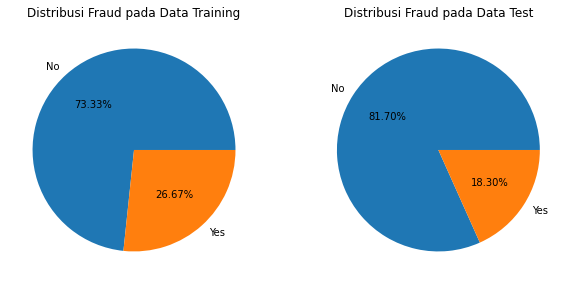

In [ ]:
#Membuat baseline sebagai patokan
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
y = df_train["fraud_reported"].value_counts()
mylabels = ["No","Yes"]
plt.pie(y, labels = mylabels, autopct="%1.2f%%")
plt.title("Distribusi Fraud pada Data Training")

plt.subplot(1, 2, 2)
y = df_test["fraud_reported"].value_counts()
mylabels = ["No","Yes"]
plt.pie(y, labels = mylabels, autopct="%1.2f%%")
plt.title("Distribusi Fraud pada Data Test")


plt.show()

Dari diagram terjadi fraud sebanyak 26,6% pada data training serta 18.30% pada data test

In [ ]:
#Melakukan pengelompokan pada data numerik dan kategorik
num_type = df_train.select_dtypes(exclude="object").columns
cat_type = df_train.select_dtypes(include="object").columns

num_type

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_date',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported',
       'month_id', 'date_id', 'year_pbd', 'month_pbd', 'date_pbd'],
      dtype='object')

In [ ]:
cat_type

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model'],
      dtype='object')

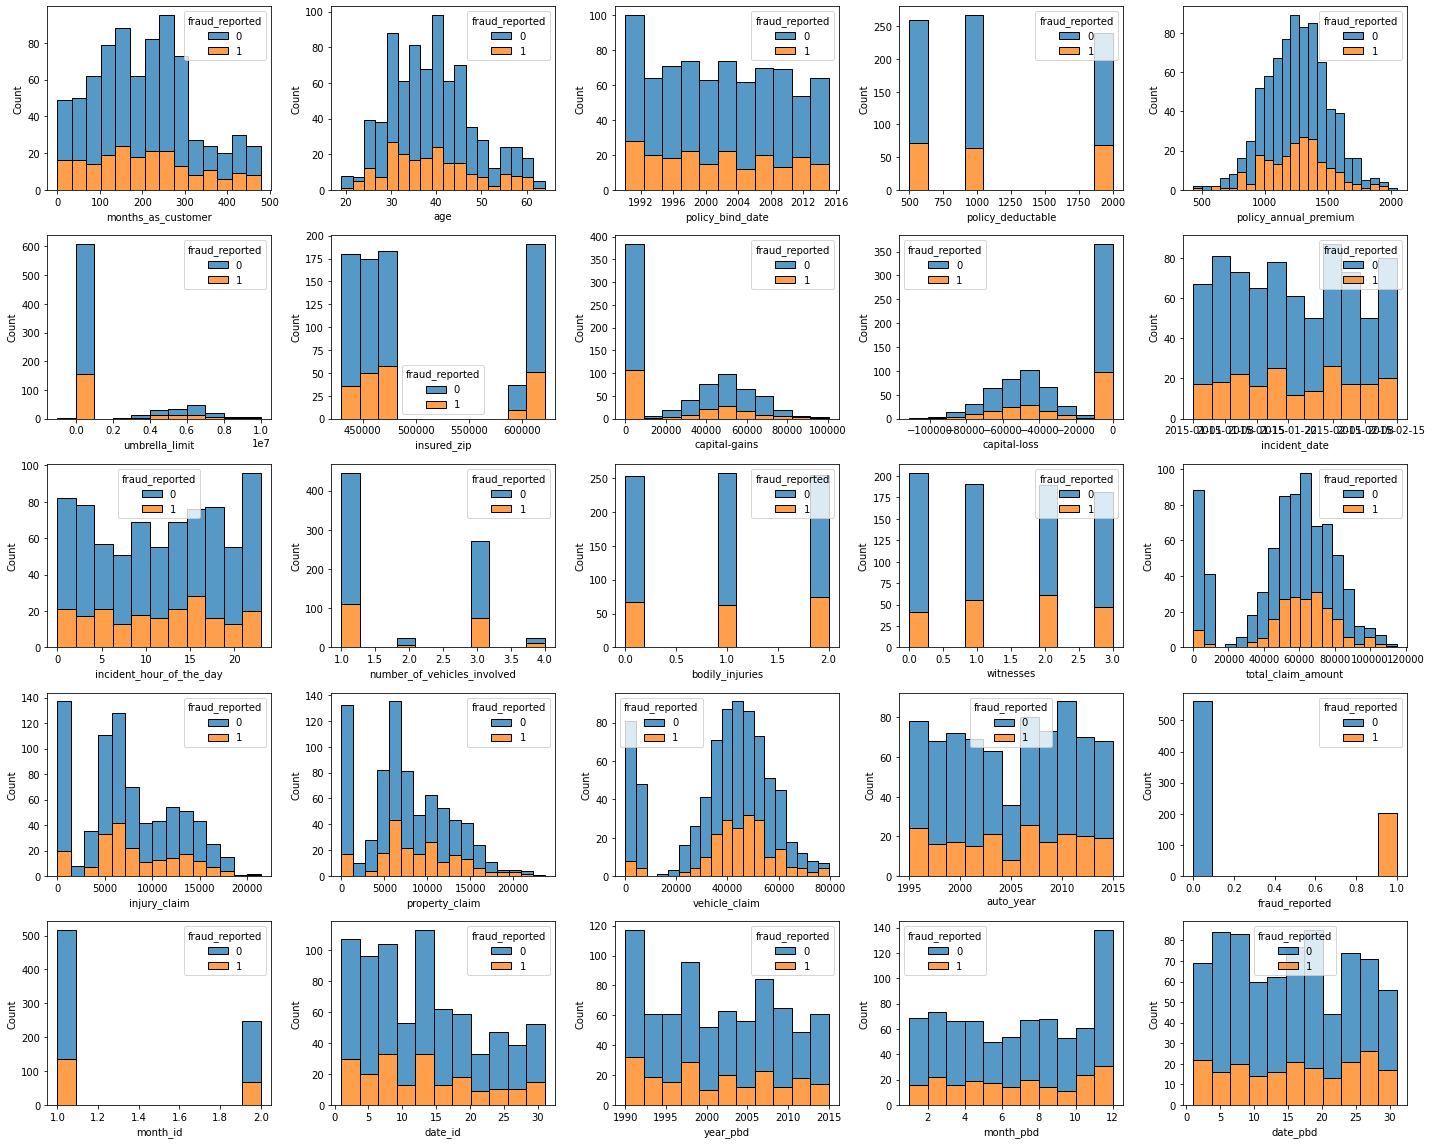

In [ ]:
#Melakukan pengujian variabel prediktor serta variabel target (fraud record)
plt.figure(figsize=(20, 16))
plt.subplot(5, 5, 1)
sns.histplot(data = df_train, x="months_as_customer", hue="fraud_reported", multiple='stack')
plt.tight_layout()
plt.subplot(5, 5, 2)
sns.histplot(data = df_train, x="age", hue="fraud_reported", multiple='stack')
plt.tight_layout()
plt.subplot(5, 5, 3)
sns.histplot(data = df_train, x="policy_bind_date", hue="fraud_reported", multiple='stack')
plt.tight_layout()
plt.subplot(5, 5, 4)
sns.histplot(data = df_train, x="policy_deductable", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 5)
sns.histplot(data = df_train, x="policy_annual_premium", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 6)
sns.histplot(data = df_train, x="umbrella_limit", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 7)
sns.histplot(data = df_train, x="insured_zip", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 8)
sns.histplot(data = df_train, x="capital-gains", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 9)
sns.histplot(data = df_train, x="capital-loss", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 10)
sns.histplot(data = df_train, x="incident_date", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 11)
sns.histplot(data = df_train, x="incident_hour_of_the_day", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 12)
sns.histplot(data = df_train, x="number_of_vehicles_involved", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 13)
sns.histplot(data = df_train, x="bodily_injuries", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 14)
sns.histplot(data = df_train, x="witnesses", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 15)
sns.histplot(data = df_train, x="total_claim_amount", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 16)
sns.histplot(data = df_train, x="injury_claim", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 17)
sns.histplot(data = df_train, x="property_claim", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 18)
sns.histplot(data = df_train, x="vehicle_claim", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 19)
sns.histplot(data = df_train, x="auto_year", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 20)
sns.histplot(data = df_train, x="fraud_reported", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 21)
sns.histplot(data = df_train, x="month_id", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 22)
sns.histplot(data = df_train, x="date_id", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 23)
sns.histplot(data = df_train, x="year_pbd", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 24)
sns.histplot(data = df_train, x="month_pbd", hue="fraud_reported", multiple="stack")
plt.tight_layout()
plt.subplot(5, 5, 25)
sns.histplot(data = df_train, x="date_pbd", hue="fraud_reported", multiple="stack")
plt.tight_layout()

plt.show()

Dilakukan pengujian histogram dengan melihat hubungan antara variabel lain dengan fraud reported. Angka 0 pada histogram menunjukkan tidak terjadi fraud, sedangkan angka 1 menunjukkan terjadinya fraud.


Dari data tersebut, dapat disimpulkan beberapa hal yang menyebabkan peningkatan kejadian fraud yaitu:
- Variabel usia pada usia 30 serta 40 tahun
- Variabel policy annual premium pada range 1000-1500
- Variabel insured zip (kode pos) pada rentang 450000 serta 600000
- Variabel capital loss terjadi peningkatan mendekati angka 0
- Variabel number of vehicle involved yaitu satu kendaraan
- Variabel total claim amount berkisar 40000-80000
- Variabel injury claim berkisar pada 5000-6000
- Variabel property claim pada angka 6000
- Variabel vehicle claim berkisar 4000-5000

Pada histogram tersebut, dapat terlihat beberapa variabel yang menghasilkan data yang cenderung konstan yaitu variabel month_as_customer, policy_bind_date, policy_deductable, body_injures, witnesses, incident_date, incident_hour_of_the_day, auto_year, year_id, date_id, year_pbd, month_pbd, serta date_pbd. 

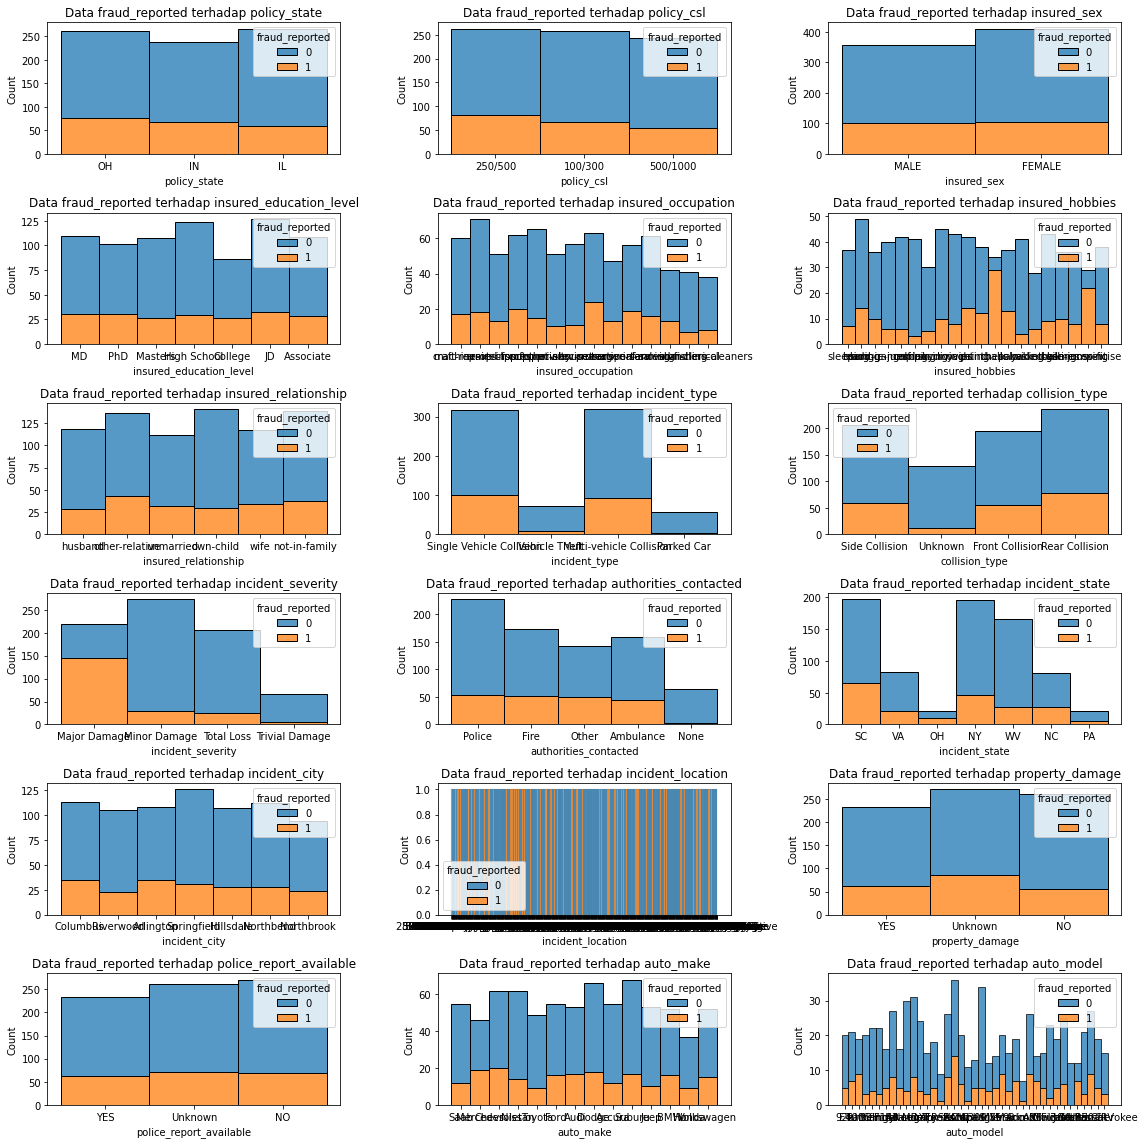

In [ ]:
plt.figure(figsize=(16, 16))

for i in range(len(cat_type)):
  plt.subplot(6, 3, i+1)
  sns.histplot(data=df_train, x=cat_type[i], hue="fraud_reported", multiple='stack')
  plt.title(f'Data fraud_reported terhadap {cat_type[i]}')
  plt.tight_layout()

plt.show()

Dilakukan pengujian histogram dengan melihat hubungan antara variabel lain dengan fraud reported. Angka 0 pada histogram menunjukkan tidak terjadi fraud, sedangkan angka 1 menunjukkan terjadinya fraud.

Dari data tersebut, dapat disimpulkan beberapa hal yang menyebabkan peningkatan kejadian fraud yaitu:
- Variabel insured hobbies, terjadi beberapa peningkatan. Namun tidak dapat terlihat sumbu x-nya
- Variabel incident type, yaitu pada single vehicle serta multi vehicle
- Variabel collision type, yaitu terjadi peningkatan pada beberapa jenis tabrakan seperti tabrakan dari depan serta rear collision.
- Variabel incident severity, terjadi peningkatan pada major damage
- Variabel authorities contacted, terjadi trend kesamaan pada variabel police, fire, other, serta ambulance. Tetapi tidak terjadi peningkatan fraud pada none.
- Variabel incident state, terjadi peningkatan pada negara bagian SC serta NY
- Variabel auto model, terjadi peningkatan kejadian fraud pada tipe model mobil tertentu. Tetapi tidak terlihat sumbu x-nya

Namun, terdapat beberapa variabel yang memiliki hasil yang cenderung konstan yaitu policy state, jenis kelamin, education level, insured occupation, insured relationship, incident city, incident location, police report available, serta auto make.

Untuk mengetahui korelasi lebih lanjut, dilakukan uji korelasi

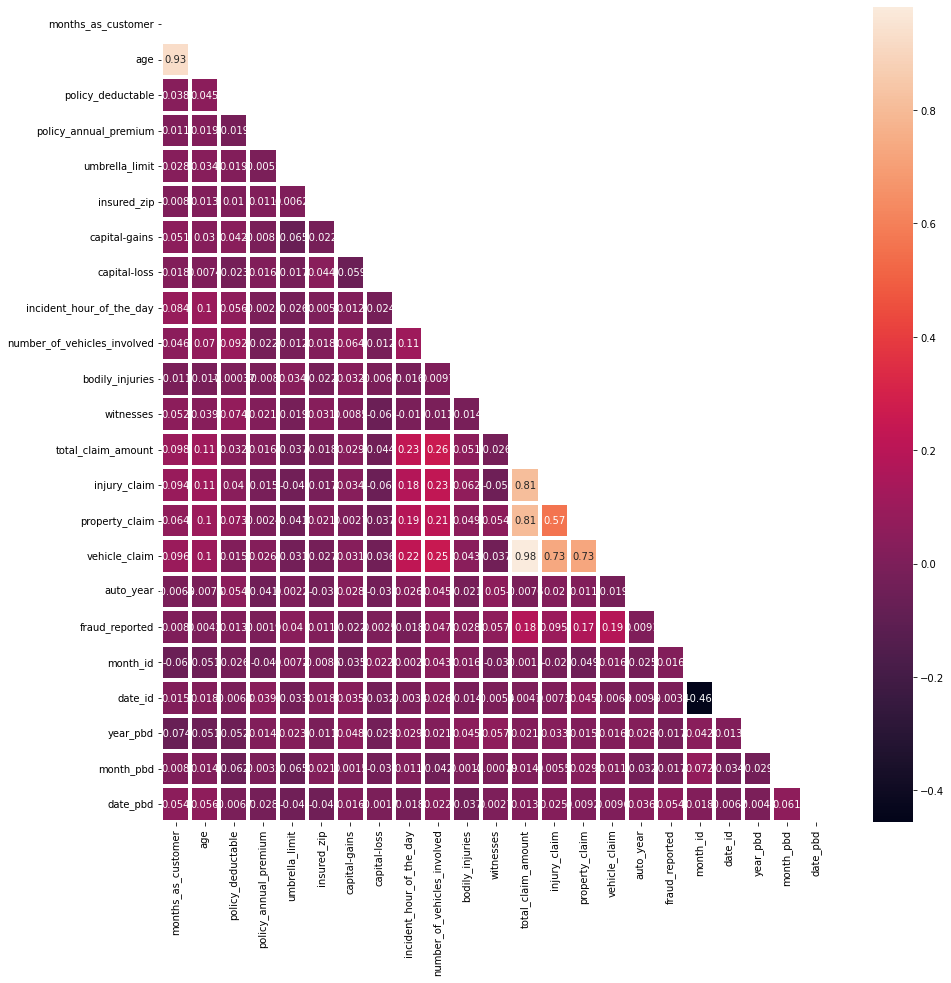

In [ ]:
fig = plt.figure(figsize=(15,15))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True, linewidths=3, mask = matrix)
plt.show()

Berdasarkan hasil uji korelasi, didapat bahwa tidak terdapat variabel yang memiliki hubungan kuat dengan fraud reported. Oleh karena itu, variabel yang digunakan untuk pengujian selanjutnya adalah variabel yang memiliki beberapa perubahan terhadap nilai fraud berdasarkan hasil histogram sebelumnya. Variabel tersebut adalah: age, policy_annual_premium, umbrella_limit, insured_zip, capital_gains, capital_loss, number_of_vehicle_involved, total_claim_amount, injury_claim, property_claim, vehicle_claim, insured_hobbies, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, serta auto_model.

#4 Membuat Model Machine Learning

In [ ]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

import scikitplot as skplt

import eli5

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#kategori ordinal
incident_severity = {"Trivial Damage": 1,
                     "Minor Damage": 2,
                     "Total Loss": 3,
                     "Major Damage": 4}

df_train["incident_severity"] = df_train["incident_severity"].map(incident_severity)
df_test["incident_severity"] = df_test["incident_severity"].map(incident_severity)

ord_policy_csl = {"100/300": 1,
                  "250/500": 2,
                  "500/1000": 3}
df_train["policy_csl"] = df_train["policy_csl"].map(ord_policy_csl)
df_test["policy_csl"] = df_test["policy_csl"].map(ord_policy_csl)

#kategori nominal
cat_nominal_col = ["insured_hobbies", "incident_type", "collision_type", 
                   "authorities_contacted", "incident_state", "auto_model"]

#melakukan training
dummies = pd.DataFrame()
for x in cat_nominal_col:
  dummies = pd.get_dummies(df_train[x],prefix=x+"__")
  df_train = pd.concat([df_train,dummies],axis=1)

#melakukan test
dummies_test = pd.DataFrame()
for x in cat_nominal_col:
  dummies_test = pd.get_dummies(df_test[x],prefix=x+"__")
  df_test = pd.concat([df_test, dummies_test],axis=1)

#drop colomn
df_train = df_train.drop(cat_nominal_col, axis=1)
df_test = df_test.drop(cat_nominal_col,axis=1)

In [ ]:
df_train.head()

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
521585                        328   48       2014-10-17           OH   
342868                        228   42       2006-06-27           IN   
227811                        256   41       1990-05-25           IL   
104594                        256   39       2006-10-12           OH   
413978                        137   34       2000-06-04           IN   

               policy_csl  policy_deductable  policy_annual_premium  \
policy_number                                                         
521585                  2               1000                1406.91   
342868                  2               2000                1197.22   
227811                  2               2000                1415.74   
104594                  2               1000                1351.10   
413978                  2               1000                1333.35   

               umbrella_limit  insured_zip insured_sex  ...  \
policy_number                                           ...   
521585                      0       466132        MALE  ...   
342868                5000000       468176        MALE  ...   
227811                6000000       608117      FEMALE  ...   
104594                      0       478456      FEMALE  ...   
413978                      0       441716        MALE  ...   

              auto_model___Pathfinder auto_model___RAM auto_model___RSX  \
policy_number                                                             
521585                              0                0                0   
342868                              0                0                0   
227811                              0                0                0   
104594                              0                0                0   
413978                              1                0                0   

               auto_model___Silverado  auto_model___TL auto_model___Tahoe  \
policy_number                                                               
521585                              0                0                  0   
342868                              0                0                  0   
227811                              0                0                  1   
104594                              0                0                  0   
413978                              0                0                  0   

               auto_model___Ultima auto_model___Wrangler auto_model___X5  \
policy_number                                                              
521585                           0                     0               0   
342868                           0                     0               0   
227811                           0                     0               0   
104594                           0                     0               0   
413978                           0                     0               0   

               auto_model___X6  
policy_number                   
521585                       0  
342868                       0  
227811                       0  
104594                       0  
413978                       0  

[5 rows x 116 columns]

In [ ]:
#menghapus 1 kolom kategorik karena terdapat rule dalam dummies, n kategoric ketika di dummies harus diambil n-1
drop_col = ["insured_hobbies___movies", "incident_type___Vehicle Theft", 
            "collision_type___Unknown", "authorities_contacted___None", 
            "incident_state___WV", "auto_model___Legacy"]

df_train = df_train.drop(drop_col, axis=1)
df_train.head()

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
521585                        328   48       2014-10-17           OH   
342868                        228   42       2006-06-27           IN   
227811                        256   41       1990-05-25           IL   
104594                        256   39       2006-10-12           OH   
413978                        137   34       2000-06-04           IN   

               policy_csl  policy_deductable  policy_annual_premium  \
policy_number                                                         
521585                  2               1000                1406.91   
342868                  2               2000                1197.22   
227811                  2               2000                1415.74   
104594                  2               1000                1351.10   
413978                  2               1000                1333.35   

               umbrella_limit  insured_zip insured_sex  ...  \
policy_number                                           ...   
521585                      0       466132        MALE  ...   
342868                5000000       468176        MALE  ...   
227811                6000000       608117      FEMALE  ...   
104594                      0       478456      FEMALE  ...   
413978                      0       441716        MALE  ...   

              auto_model___Pathfinder auto_model___RAM auto_model___RSX  \
policy_number                                                             
521585                              0                0                0   
342868                              0                0                0   
227811                              0                0                0   
104594                              0                0                0   
413978                              1                0                0   

               auto_model___Silverado  auto_model___TL auto_model___Tahoe  \
policy_number                                                               
521585                              0                0                  0   
342868                              0                0                  0   
227811                              0                0                  1   
104594                              0                0                  0   
413978                              0                0                  0   

               auto_model___Ultima auto_model___Wrangler auto_model___X5  \
policy_number                                                              
521585                           0                     0               0   
342868                           0                     0               0   
227811                           0                     0               0   
104594                           0                     0               0   
413978                           0                     0               0   

               auto_model___X6  
policy_number                   
521585                       0  
342868                       0  
227811                       0  
104594                       0  
413978                       0  

[5 rows x 110 columns]

In [ ]:
df_test = df_test[df_train.columns.to_list()]
df_test.head()

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
687698                        134   29       2000-09-06           OH   
367455                        228   44       2014-06-06           IL   
429027                        165   37       1990-02-03           IL   
558938                         70   26       2005-06-08           OH   
143972                        196   39       1992-08-02           IN   

               policy_csl  policy_deductable  policy_annual_premium  \
policy_number                                                         
687698                  1               2000                1413.14   
367455                  3               1000                1583.91   
429027                  1               1000                1137.03   
558938                  3               1000                1199.44   
143972                  3               2000                1475.73   

               umbrella_limit  insured_zip insured_sex  ...  \
policy_number                                           ...   
687698                5000000       430632      FEMALE  ...   
367455                6000000       610706        MALE  ...   
429027                      0       603195        MALE  ...   
558938                5000000       619884        MALE  ...   
143972                      0       477670      FEMALE  ...   

              auto_model___Pathfinder auto_model___RAM auto_model___RSX  \
policy_number                                                             
687698                              0                1                0   
367455                              0                0                1   
429027                              0                0                0   
558938                              0                0                0   
143972                              1                0                0   

               auto_model___Silverado  auto_model___TL auto_model___Tahoe  \
policy_number                                                               
687698                              0                0                  0   
367455                              0                0                  0   
429027                              0                0                  0   
558938                              0                0                  0   
143972                              0                0                  0   

               auto_model___Ultima auto_model___Wrangler auto_model___X5  \
policy_number                                                              
687698                           0                     0               0   
367455                           0                     0               0   
429027                           0                     0               0   
558938                           0                     0               0   
143972                           0                     0               0   

               auto_model___X6  
policy_number                   
687698                       0  
367455                       0  
429027                       0  
558938                       0  
143972                       0  

[5 rows x 110 columns]

In [ ]:
#Membuat x train, y train, x test, y test
x_train = df_train.drop("fraud_reported",axis=1).copy()
y_train = df_train["fraud_reported"].copy()

x_test = df_test.drop("fraud_reported",axis=1).copy()
y_test = df_test["fraud_reported"].copy()

**Logistic Regression**

In [ ]:
logistic_reg = LogisticRegression(solver = "saga", l1_ratio = 0)

#parameter
random_grid = {"penalty": ["elasticnet","l2"],
               "fit_intercept": [True, False],
               "C": [0.25, 0.5, 0.75, 1.0]}

scoreFunction = {"f1":"f1"}

In [ ]:
#Melakukan random search untuk mencari parameter terbaik
random_search = RandomizedSearchCV(logistic_reg,
                                 param_distributions = random_grid,
                                 n_iter = 100,
                                 scoring = scoreFunction,
                                 refit = "f1",
                                 return_train_score = False,
                                 random_state = 0,
                                 verbose = 2,
                                 cv = 3,
                                 n_jobs = -1)
x_train_only_number = x_train.select_dtypes(exclude=['datetime64[ns]', 'object'])
x_test_only_number = x_test.select_dtypes(exclude=["datetime64[ns]", "object"])
random_search.fit(x_train_only_number, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(l1_ratio=0, solver='saga'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0],
                                        'fit_intercept': [True, False],
                                        'penalty': ['elasticnet', 'l2']},
                   random_state=0, refit='f1', scoring={'f1': 'f1'}, verbose=2)

In [ ]:
#Cek parameter terbaik
random_search.best_params_

{'C': 0.25, 'fit_intercept': True, 'penalty': 'elasticnet'}

In [ ]:
#Cek estimator terbaik
random_search.best_estimator_

LogisticRegression(C=0.25, l1_ratio=0, penalty='elasticnet', solver='saga')

In [ ]:
#melakukan training data
#predict
pred_result = random_search.predict(x_train_only_number)
pred_proba_result = random_search.predict_proba(x_train_only_number)

In [ ]:
#check classification report result
pd.DataFrame(metrics.classification_report(y_train, pred_result, output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0      1  accuracy   macro avg  weighted avg
precision    0.733333    0.0  0.733333    0.366667      0.537778
recall       1.000000    0.0  0.733333    0.500000      0.733333
f1-score     0.846154    0.0  0.733333    0.423077      0.620513
support    561.000000  204.0  0.733333  765.000000    765.000000

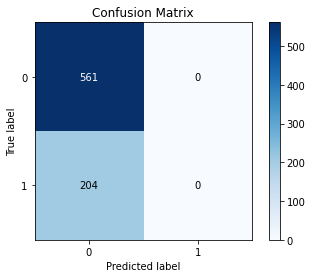

In [ ]:
#Check Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_train, pred_result)

Confusion Matrix melakukan pengukuran performa untuk cara machine learning melakukan klasifikasi. 

Dari tabel diatas, dapat dilihat bahwa nilai True Negative yaitu 561 dan False Negative yaitu 204 (memprediksi nilai negatif tetapi salah)

In [ ]:
#Melihat nilai AUC dan Gini
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_train, random_search.predict_proba(x_train_only_number)[:,1])
roc_auc_value = metrics.roc_auc_score(y_train, random_search.predict_proba(x_train_only_number)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print("AUC Logistic Regression on Fraud Data: ", round(roc_auc_value*100,2), '%')
print("Gini Logistic Regession on Fraud Data: ", round(gini_value*100,2), "%")

AUC Logistic Regression on Fraud Data:  55.06 %
Gini Logistic Regession on Fraud Data:  10.12 %


Berdasarkan penelitian Hidayat dan Indira (2011) memaparkan bahwa nilai AUC pada rentang 0.5-0.6 memiliki makna tingkat akurasi yang sangat lemah

Sedangkan indeks Gini merupakan indeks yang menginformasikan seberapa murni sebuah node.

In [ ]:
#melakukan test data (prediksi)
#check classification report result
pd.DataFrame(metrics.classification_report(y_test, random_search.predict(x_test_only_number), output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0     1  accuracy   macro avg  weighted avg
precision    0.817021   0.0  0.817021    0.408511      0.667524
recall       1.000000   0.0  0.817021    0.500000      0.817021
f1-score     0.899297   0.0  0.817021    0.449649      0.734745
support    192.000000  43.0  0.817021  235.000000    235.000000

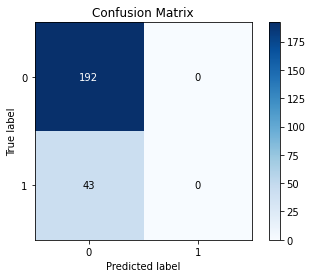

In [ ]:
#Check Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, random_search.predict(x_test_only_number))

Dari tabel diatas, dapat dilihat bahwa nilai True Negative yaitu 191 dan False Negative yaitu 43 (memprediksi nilai negatif tetapi salah). Hasil ini lebih rendah dibandingkan data training. 

In [ ]:
#Melihat nilai AUC dan Gini
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, random_search.predict_proba(x_test_only_number)[:,1])
roc_auc_value = metrics.roc_auc_score(y_test, random_search.predict_proba(x_test_only_number)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print("AUC Logistic Regression on Fraud Data: ", round(roc_auc_value*100,2), '%')
print("Gini Logistic Regession on Fraud Data: ", round(gini_value*100,2), "%")

AUC Logistic Regression on Fraud Data:  51.3 %
Gini Logistic Regession on Fraud Data:  2.6 %


Pada hasil AUC serta index Gini juga menunjukkan bahwa model tersebut kurang baik dalam hal akurasi

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

#parameter
random_grid_knn = {"n_neighbors": [2,3,4,5],
                   "p": [1,2]}
scoreFunction = {"f1":"f1"}

random_search_knn = RandomizedSearchCV (knn,
                                        param_distributions = random_grid_knn,
                                        n_iter = 100,
                                        scoring = scoreFunction,
                                        refit = "f1",
                                        return_train_score = False,
                                        random_state = 0,
                                        verbose = 2,
                                        cv = 3,
                                        n_jobs = -1)

#Melakukan train data
random_search_knn.fit(x_train_only_number, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 3, 4, 5],
                                        'p': [1, 2]},
                   random_state=0, refit='f1', scoring={'f1': 'f1'}, verbose=2)

In [ ]:
#check classification report result
pd.DataFrame(metrics.classification_report(y_train, random_search_knn.predict(x_train_only_number), output_dict=True))

0           1  accuracy   macro avg  weighted avg
precision    0.837795    0.776923  0.827451    0.807359      0.821563
recall       0.948307    0.495098  0.827451    0.721702      0.827451
f1-score     0.889632    0.604790  0.827451    0.747211      0.813674
support    561.000000  204.000000  0.827451  765.000000    765.000000

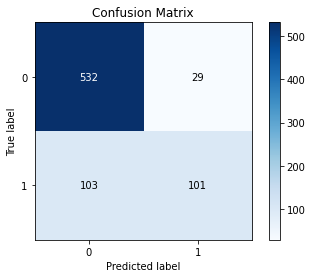

In [ ]:
#Check Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_train, random_search_knn.predict(x_train_only_number))

In [ ]:
#Melihat nilai AUC dan Gini
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_train, random_search_knn.predict_proba(x_train_only_number)[:,1])
roc_auc_value = metrics.roc_auc_score(y_train, random_search_knn.predict_proba(x_train_only_number)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print("AUC KNN on Fraud Data: ", round(roc_auc_value*100,2), '%')
print("Gini KNN on Fraud Data: ", round(gini_value*100,2), "%")

AUC KNN on Fraud Data:  85.89 %
Gini KNN on Fraud Data:  71.78 %


Berdasarkan hasil yang didapatkan, terlihat bahwa model KNN lebih baik dibandingkan Logitic Regression. 

Pada tabel Confusion Matrix, model ini dapat menginterpretasikan lebih banyak jawaban dibandingkan model Logistic Regression. Berdasarkan nilai f1 score pun lebih baik terutama pada parameter 1.

Selain itu, pada nilai AUC mencapai 0.85 yang dapat dikatakan memiliki tingkat akurasi yang tinggi menurut Hidayat dan Indira (2011) pada penelitian yang berjudul Metodologi Penelitian Psikodiagnostika. 

In [ ]:
#Melakukan test pada data (prediksi)
pd.DataFrame(metrics.classification_report(y_test, random_search_knn.predict(x_test_only_number), output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.818627   0.193548   0.73617    0.506088      0.704251
recall       0.869792   0.139535   0.73617    0.504663      0.736170
f1-score     0.843434   0.162162   0.73617    0.502798      0.718776
support    192.000000  43.000000   0.73617  235.000000    235.000000

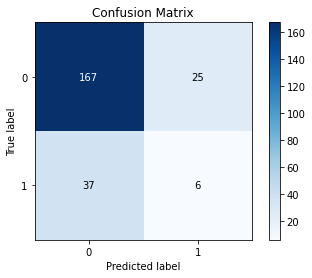

In [ ]:
#Check Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, random_search_knn.predict(x_test_only_number))

In [ ]:
#Melihat nilai AUC dan Gini
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, random_search_knn.predict_proba(x_test_only_number)[:,1])
roc_auc_value = metrics.roc_auc_score(y_test, random_search_knn.predict_proba(x_test_only_number)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print("AUC KNN on Fraud Data: ", round(roc_auc_value*100,2), '%')
print("Gini KNN on Fraud Data: ", round(gini_value*100,2), "%")

AUC KNN on Fraud Data:  52.17 %
Gini KNN on Fraud Data:  4.34 %


Berdasrkan hasil yang didapatkan, terjadi penurunan dibandingkan dengan train test. Pada nilai AUC terjadi penurunan menjadi 0.52 yang dapat diinterpretasikan bahwa akurasi data sangat lemah. Tetapi, dibandingkan hasil test dari Logistic Regression, penggunaan model KNN memiliki hasil yang lebih baik.

**Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

random_grid_rf = {"n_estimators": [10,50,100,1000],
                  "max_features": ["sqrt","log2"],
                  "criterion": ["gini","entropy"]}

scoreFunction = {"f1":"f1"}

random_search_rf = RandomizedSearchCV(rf,
                                      param_distributions = random_grid_rf,
                                      n_iter = 100,
                                      scoring = scoreFunction,
                                      refit = "f1",
                                      return_train_score = False,
                                      random_state = 0,
                                      verbose = 2,
                                      cv =3,
                                      n_jobs = -1)
#Melakukan train data
random_search_rf.fit(x_train_only_number, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 50, 100, 1000]},
                   random_state=0, refit='f1', scoring={'f1': 'f1'}, verbose=2)

In [ ]:
#check classification report result
pd.DataFrame(metrics.classification_report(y_train, random_search_rf.predict(x_train_only_number), output_dict=True))

0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    561.0  204.0       1.0      765.0         765.0

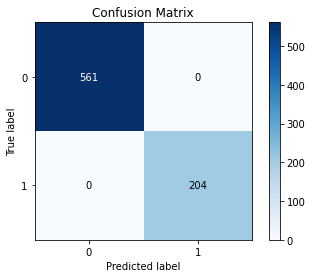

In [ ]:
#Check Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_train, random_search_rf.predict(x_train_only_number))

In [ ]:
#Melihat nilai AUC dan Gini
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_train, random_search_rf.predict_proba(x_train_only_number)[:,1])
roc_auc_value = metrics.roc_auc_score(y_train, random_search_rf.predict_proba(x_train_only_number)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print("AUC Random Forrest on Fraud Data: ", round(roc_auc_value*100,2), '%')
print("Gini Random Forrest on Fraud Data: ", round(gini_value*100,2), "%")

AUC Random Forrest on Fraud Data:  100.0 %
Gini Random Forrest on Fraud Data:  100.0 %


Berdasarkan hasil f1-score didapatkan bahwa baik parameter 0 maupun 1 memiliki nilai 1.0 yang menunjukkan sebagai nilai terbaik. Hal ini dapat dilihat pada Tabel Confusion Matrix, model ini dapat mempelajari data dengan baik tanpa melakukan kesalahan baik itu FP maupun NP. Bahkan nilai AUC serta Gini nya pun sangat sempurna

In [ ]:
#Melakukan test pada data (prediksi)
pd.DataFrame(metrics.classification_report(y_test, random_search_rf.predict(x_test_only_number), output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.862944   0.421053  0.791489    0.641998      0.782087
recall       0.885417   0.372093  0.791489    0.628755      0.791489
f1-score     0.874036   0.395062  0.791489    0.634549      0.786394
support    192.000000  43.000000  0.791489  235.000000    235.000000

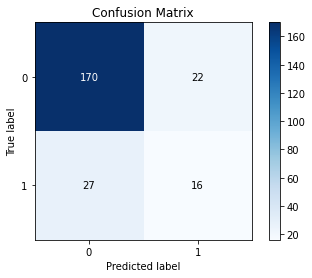

In [ ]:
#Check Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, random_search_rf.predict(x_test_only_number))

In [ ]:
#Melihat nilai AUC dan Gini
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, random_search_rf.predict_proba(x_test_only_number)[:,1])
roc_auc_value = metrics.roc_auc_score(y_test, random_search_rf.predict_proba(x_test_only_number)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print("AUC Random Forrest on Fraud Data: ", round(roc_auc_value*100,2), '%')
print("Gini Random Forrest on Fraud Data: ", round(gini_value*100,2), "%")

AUC Random Forrest on Fraud Data:  80.0 %
Gini Random Forrest on Fraud Data:  60.0 %


Terjadi penurunan pada test dibandingkan train. Hal ini dapat dilihat bahwa pada Tabel Confusion Matrix menunjukkan beberapa nilai FP dan NP. Nilai f1-score nya pun juga mengalami penurunan.

Penurunan lainnya juga dapat terlihat pada nilai AUC pada model ini mengalami penurunan dibandingkan KNN tetapi masih lebih tinggi dibandingkan Logistic Regression. Nilai AUC pada model ini tergolong memiliki akurasi sedang. Begitupun dengan nilai Gini yang lebih rendah dibandingkan KNN, tetapi masih lebih baik dibandingkan Logistic Regression.

Sehingga, dapat disimpulkan bahwa model Random Forest pada data ini overfit

**XgBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

random_grid_xgb = {"n_estimators": [10,50,100],
                   "learning_rate": [0.1, 0.05, 0.01],
                   "max_depth": [3,5,10],
                   "grow_policy": ["depthwise","lossguide"]}

scoreFunction = {"f1":"f1"}

random_search_xgb = RandomizedSearchCV(xgb,
                                       param_distributions = random_grid_xgb,
                                       n_iter = 100,
                                       scoring = scoreFunction,
                                       refit = "f1",
                                       return_train_score = False,
                                       random_state = 0,
                                       verbose = 2,
                                       cv = 3,
                                       n_jobs = -1)

#Melakukan train data
random_search_xgb.fit(x_train_only_number, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=

In [ ]:
#check classification report result
pd.DataFrame(metrics.classification_report(y_train, random_search_xgb.predict(x_train_only_number), output_dict=True))

0           1  accuracy   macro avg  weighted avg
precision    0.959615    0.746939  0.891503    0.853277      0.902902
recall       0.889483    0.897059  0.891503    0.893271      0.891503
f1-score     0.923219    0.815145  0.891503    0.869182      0.894399
support    561.000000  204.000000  0.891503  765.000000    765.000000

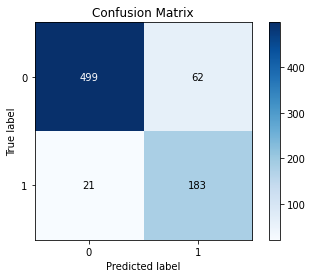

In [ ]:
#Check Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_train, random_search_xgb.predict(x_train_only_number))

In [ ]:
#Melihat nilai AUC dan Gini
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_train, random_search_xgb.predict_proba(x_train_only_number)[:,1])
roc_auc_value = metrics.roc_auc_score(y_train, random_search_xgb.predict_proba(x_train_only_number)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print("AUC XgBoost on Fraud Data: ", round(roc_auc_value*100,2), '%')
print("Gini XgBoost on Fraud Data: ", round(gini_value*100,2), "%")

AUC XgBoost on Fraud Data:  92.11 %
Gini XgBoost on Fraud Data:  84.22 %


Berdasarkan hasil train model XgBoost terlihat cukup baik. Hal ini dapat dilihat pada f1-score pada parameter 0 maupun 1 yang tinggi. Selain itu, pada Tabel Confusion Matrix juga menunjukkan bahwa model ini cukup bisa menentukan dengan baik. Apabila melihat nilai AUC maupun Gini pun juga sangat baik

In [ ]:
#Melakukan test pada data (prediksi)
pd.DataFrame(metrics.classification_report(y_test, random_search_xgb.predict(x_test_only_number), output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.946108   0.500000  0.817021    0.723054      0.864480
recall       0.822917   0.790698  0.817021    0.806807      0.817021
f1-score     0.880223   0.612613  0.817021    0.746418      0.831256
support    192.000000  43.000000  0.817021  235.000000    235.000000

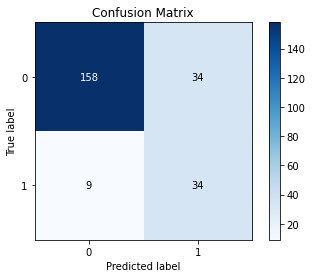

In [ ]:
#Check Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, random_search_xgb.predict(x_test_only_number))

In [ ]:
#Melihat nilai AUC dan Gini
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, random_search_xgb.predict_proba(x_test_only_number)[:,1])
roc_auc_value = metrics.roc_auc_score(y_test, random_search_xgb.predict_proba(x_test_only_number)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print("AUC XgBoost on Fraud Data: ", round(roc_auc_value*100,2), '%')
print("Gini XgBoost on Fraud Data: ", round(gini_value*100,2), "%")

AUC XgBoost on Fraud Data:  82.27 %
Gini XgBoost on Fraud Data:  64.54 %


Berdasarkan hasil nilai test menggunakan model ini, terjadi penurunan dibandingkan nilai train. Hasil ini terlihat lebih baik dibandingkan Random Forest serta Logistic Regression, tetapi masih lebih rendah sedikit dibandingkan KNN apabila dilihat dari nilai AUC. Tetapi, dari segi nilai Gini memiliki nilai paling baik.

**Menghitung G-means**

Hal ini dikarenakan data imbalance (distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya)

In [ ]:
#melakukan perhitungan g-means
import numpy as np
gmean = np.sqrt(true_positive_rate*(1-false_positive_rate))

#mencari threshold optimal
ix = np.argmax(gmean)
print("Best Threshold=%f, G-Mean= %.3f" % (threshold[ix], gmean[ix]))

Best Threshold=0.496116, G-Mean= 0.816


Didapatkan bahwa best threshold adalah 0.496116 serta G-mean yaitu 0.816

# 5. Interpretasi Model Terbaik (Berdasarkan F1- Score)

Model terbaik berdasarkan uji sebelumnya adalah XgBoost, sehingga model tersebut yang digunakan

In [ ]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#initiate explainer for XgBoost Model
import dalex as dx
xgb_dummy = xgb
xgb_dummy.fit(x_train_only_number, y_train)
fraud_xgb_exp = dx.Explainer(xgb_dummy, x_train_only_number, y_train, label = "XgBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 765 rows 97 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 765 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XgBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f0ad7609560> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 5.61e-05, mean = 0.267, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0716, mean = 1.06e-05, max = 0.0937
  -> model_info        : package xgboost

A new explainer has been created!


In [ ]:
#visualize permutation feature importance for XgBoost Model
fraud_xgb_exp.model_parts().plot()

Feature Importance dapat menjadi salah satu tolah ukur besaran kontribusi berbagai data feature yang dilatih kepada performa model prediksi. 

Berdasarkan grafik diatas, dapat dilihat bahwa model XgBoost mampu melakukan prediksi kejadian fraud dengan baik pada variabel incident_severity, insured_hobbies___chess, serta insured_hobbies___cross-fit sebagai tiga variabel teratas.

In [ ]:
#Create Partial Dependence Plot of XgBoost Model
fraud_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 97/97 [00:20<00:00,  4.81it/s]


PDP menunjukkan efek marginal satu atau dua fitur pada hasil prediksi model machine learning. PDP dapat menunjukkan apakah hubungan antara target dan fitur adalah linier, monoton, atau lebih kompleks.

Berdasarkan hasil PDP diatas, dapat dilihat bahwa terdapat beberapa variabel yang cenderung stagnan (garis lurus), ada juga yang mengalami kenaikan.

Oleh karena itu, dapat disimpulkan bahwa terdapat beberapa ciri-ciri yang dapat meningkatkan terjadinya fraud sehingga perlu menjadi perhatian bagi perusahaan. Beberapa ciri-ciri tersebut yaitu:
- policy annual premium diatas 1800 dengan probabilitas sebesar 0.31
- terjadi pada jam 5-10 dengan probabilitas sebesar 0.31
- incident severity pada tingkat major damage dengan probabilitas sebesar 0.63
- yang memiliki hobi bermain catur dengan probabilitas sebesar 0.76
- yang memiliki hobi cross fit dengan probabilitas 0.67
- yang memiliki hobi yachting dengan probabilitas 0.31
- memiliki tipe mobil Grand Cherokee dengan probabilitas 0.32

Tetapi, terdapat beberapa ciri-ciri yang menunjukkan terjadinya penurunan kejadian fraud yaitu:
- pelanggan yang memiliki hobi berkemah 
- pelanggan yang memiliki hobi tidur
- menghubungi ambulan
- memiliki tipe mobil Wranger

#6 Melakukan Interpretasi dengan LIME

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
#Define Random Forest Explainer with LIME Module
lime_explainer = LimeTabularExplainer(
    x_train_only_number.values,
    feature_names = x_train_only_number.columns.tolist(),
    class_names = ["fraud","retained"],
    discretize_continuous = True,
    verbose = True
)

In [ ]:
x_train_only_number_includes_policy_number = x_train_only_number
x_train_pn = x_train_only_number_includes_policy_number.reset_index()
x_train_pn

policy_number  months_as_customer  age  policy_csl  policy_deductable  \
0           521585                 328   48           2               1000   
1           342868                 228   42           2               2000   
2           227811                 256   41           2               2000   
3           104594                 256   39           2               1000   
4           413978                 137   34           2               1000   
..             ...                 ...  ...         ...                ...   
760         109392                 257   44           1               1000   
761         215278                  94   26           1                500   
762         681486                 141   30           3               1000   
763         186934                 285   41           1               1000   
764         918516                 130   34           2                500   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1415.74         6000000       608117          48900   
3                  1351.10               0       478456              0   
4                  1333.35               0       441716              0   
..                     ...             ...          ...            ...   
760                1280.88               0       433981          59400   
761                 722.66               0       433696          50300   
762                1347.04               0       430665              0   
763                1436.79               0       608177          70900   
764                1383.49         3000000       442797          35100   

     capital-loss  ...  auto_model___Pathfinder  auto_model___RAM  \
0               0  ...                        0                 0   
1               0  ...                        0                 0   
2          -62400  ...                        0                 0   
3               0  ...                        0                 0   
4          -77000  ...                        1                 0   
..            ...  ...                      ...               ...   
760        -32200  ...                        0                 0   
761             0  ...                        1                 0   
762        -82100  ...                        0                 0   
763             0  ...                        0                 0   
764             0  ...                        0                 0   

     auto_model___RSX  auto_model___Silverado  auto_model___TL  \
0                   0                       0                0   
1                   0                       0                0   
2                   0                       0                0   
3                   0                       0                0   
4                   0                       0                0   
..                ...                     ...              ...   
760                 0                       0                1   
761                 0                       0                0   
762                 0                       0                0   
763                 0                       0                0   
764                 0                       0                0   

     auto_model___Tahoe  auto_model___Ultima  auto_model___Wrangler  \
0                     0                    0                      0   
1                     0                    0                      0   
2                     1                    0                      0   
3                     0                    0                      0   
4                     0                    0                      0   
..                  ...                  ...                    ...   
760                   0                    0                

In [ ]:
x_test_only_number_includes_policy_number = x_test_only_number
x_test_pn = x_test_only_number_includes_policy_number.reset_index()
x_test_pn

policy_number  months_as_customer  age  policy_csl  policy_deductable  \
0           687698                 134   29           1               2000   
1           367455                 228   44           3               1000   
2           429027                 165   37           1               1000   
3           558938                  70   26           3               1000   
4           143972                 196   39           3               2000   
..             ...                 ...  ...         ...                ...   
230         591269                 295   46           1                500   
231         674570                 124   28           2               1000   
232         941851                   3   38           3               1000   
233         533940                 458   62           3               2000   
234         556080                 456   60           2               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1413.14         5000000       430632          35100   
1                  1583.91         6000000       610706          66000   
2                  1137.03               0       603195              0   
3                  1199.44         5000000       619884          63600   
4                  1475.73               0       477670          57000   
..                     ...             ...          ...            ...   
230                1672.88               0       478947              0   
231                1235.14               0       443567              0   
232                1310.80               0       431289              0   
233                1356.92         5000000       441714              0   
234                 766.19               0       612260              0   

     capital-loss  ...  auto_model___Pathfinder  auto_model___RAM  \
0               0  ...                        0                 1   
1          -46000  ...                        0                 0   
2               0  ...                        0                 0   
3               0  ...                        0                 0   
4          -27300  ...                        1                 0   
..            ...  ...                      ...               ...   
230             0  ...                        0                 0   
231        -32100  ...                        0                 0   
232             0  ...                        0                 0   
233             0  ...                        0                 0   
234             0  ...                        0                 0   

     auto_model___RSX  auto_model___Silverado  auto_model___TL  \
0                   0                       0                0   
1                   1                       0                0   
2                   0                       0                0   
3                   0                       0                0   
4                   0                       0                0   
..                ...                     ...              ...   
230                 0                       0                0   
231                 0                       0                0   
232                 0                       0                0   
233                 0                       0                0   
234                 0                       0                0   

     auto_model___Tahoe  auto_model___Ultima  auto_model___Wrangler  \
0                     0                    0                      0   
1                     0                    0                      0   
2                     0                    0                      0   
3                     0                    0                      0   
4                     0                    0                      0   
..                  ...                  ...                    ...   
230                   0                    0                

**Policy Number 527945**

In [ ]:
#collect data for policy number 527945
id_policy_number_527945 = x_test_pn[x_test_pn['policy_number'] == 527945].index[0]
policy_number_527945 = x_test_only_number.iloc[id_policy_number_527945]
policy_number_527945

months_as_customer        319.00
age                        47.00
policy_csl                  2.00
policy_deductable         500.00
policy_annual_premium    1307.11
                          ...   
auto_model___Tahoe          0.00
auto_model___Ultima         0.00
auto_model___Wrangler       0.00
auto_model___X5             0.00
auto_model___X6             0.00
Name: 527945, Length: 97, dtype: float64

In [ ]:
#explain Random Forest Prediction for Policy Number 527945
lime_explainer.explain_instance(policy_number_527945, random_search_rf.predict_proba).show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Intercept 0.9106274599232567
Prediction_local [0.20702221]
Right: 0.1


In [ ]:
#eror
!pip install -U xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lime_explainer.explain_instance(policy_number_527945, xgb.predict_proba)

Intercept 1.0942903125281034
Prediction_local [0.08133707]
Right: 0.0112618515


Dalam mengambil data policy number 527945 menggunakan x test karena nomor polis tersebut terletak setelah tanggal 15 Februari 2015. 

Berdasarkan model LIME pada polis tersebut, dapat dilihat bahwa model tersebut 90% confident dalam memprediksi fraud. Prediksi bahwa probabilitas untuk mengalami fraud sangat tinggi pada pelanggan asuransi yang memiliki hobi bermain catur, memiliki hobi cross fit, serta incident severity dengan kategori Total Loss serta Major Damage. Hal ini sesuai dengan hasil dari interpretasi XgBoost sebelumnya.

Sedangkan makna pada pengecekan eror yaitu dapat dilihat nilai intercept. Intercept merupakan koefisien yang dimiliki model regresi. 

**Policy Number 235220**


In [ ]:
#collect data for policy number 235220
id_policy_number_235220 = x_train_pn[x_train_pn['policy_number'] == 235220].index[0]
policy_number_235220 = x_test_only_number.iloc[id_policy_number_235220]
policy_number_235220

months_as_customer        201.00
age                        40.00
policy_csl                  2.00
policy_deductable        2000.00
policy_annual_premium    1315.56
                          ...   
auto_model___Tahoe          0.00
auto_model___Ultima         0.00
auto_model___Wrangler       0.00
auto_model___X5             0.00
auto_model___X6             0.00
Name: 799501, Length: 97, dtype: float64

In [ ]:
#explain Random Forest Prediction for Policy Number 235220
lime_explainer.explain_instance(policy_number_235220, random_search_rf.predict_proba).show_in_notebook(show_table=True)

Intercept 1.009862398491357
Prediction_local [0.16862056]
Right: 0.09


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
#error
lime_explainer.explain_instance(policy_number_235220, xgb.predict_proba)

Intercept 1.1461621057658573
Prediction_local [-0.05241535]
Right: 0.01126269


Dalam mengambil data policy number 235220 menggunakan x train karena nomor polis tersebut terletak sebelum tanggal 15 Februari 2015. 

Berdasarkan model LIME pada polis tersebut, dapat dilihat bahwa model tersebut 91% confident dalam memprediksi fraud. Prediksi bahwa probabilitas untuk mengalami fraud sangat tinggi pada pelanggan asuransi yang memiliki hobi bermain catur, memiliki hobi cross fit, incident severity (kategori Total Loss serta Major Damage), vehicle claim, serta yang memiliki tipe mobil ML 350. Walaupun terdapat beberapa perbedaan, tetapi terdapat variabel yang mudah diprediksi akan terjadi fraud.

Sedangkan makna pada pengecekan eror yaitu dapat dilihat nilai intercept. Intercept merupakan koefisien yang dimiliki model regresi. 

**Policy Number 605100**

In [ ]:
#collect data for policy number 605100
id_policy_number_605100 = x_train_pn[x_train_pn['policy_number'] == 605100].index[0]
policy_number_605100 = x_train_only_number.iloc[id_policy_number_605100]
policy_number_605100

months_as_customer        258.00
age                        41.00
policy_csl                  1.00
policy_deductable         500.00
policy_annual_premium    1042.25
                          ...   
auto_model___Tahoe          0.00
auto_model___Ultima         0.00
auto_model___Wrangler       0.00
auto_model___X5             0.00
auto_model___X6             0.00
Name: 605100, Length: 97, dtype: float64

In [ ]:
#explain Random Forest Prediction for Policy Number 605100
lime_explainer.explain_instance(policy_number_605100, random_search_rf.predict_proba).show_in_notebook(show_table=True)

Intercept 0.8408055936002297
Prediction_local [0.46373381]
Right: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
#error
lime_explainer.explain_instance(policy_number_605100, xgb.predict_proba)

Intercept 0.9436966646008099
Prediction_local [0.67039461]
Right: 0.97746265


Dalam mengambil data policy number 605100 menggunakan x train karena nomor polis tersebut terletak sebelum tanggal 15 Februari 2015.

Berdasarkan model LIME pada polis tersebut, dapat dilihat bahwa model tersebut 84% confident dalam memprediksi retain. Prediksi bahwa probabilitas untuk mengalami fraud sangat tinggi pada pelanggan asuransi yang memiliki hobi bermain catur serta memiliki hobi cross fit. Sedangkan variabel yang diperkirakan akan retain (tidak fraud) adalah incident severity serta pelanggan yang memiliki hobi berkemah. Walaupun terdapat beberapa perbedaan, tetapi terdapat variabel yang mudah diprediksi akan terjadi fraud.

Sedangkan makna pada pengecekan eror yaitu dapat dilihat nilai intercept. Intercept merupakan koefisien yang dimiliki model regresi.